### MIMIC CXR

* [Dataset](https://physionet.org/content/mimic-cxr/2.0.0/)

* [Original Paper](https://www.nature.com/articles/s41597-019-0322-0)

In [1]:
%cd ..

/home/datascience/DF-DM


### Setup Environment:

In [2]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data
from src.classifiers import VQADataset
from torch.utils.data import DataLoader
from src.classifiers import train_early_fusion

In [3]:
PATH = 'Embeddings/mimic/'
COLUMN = 'embeddings'

num_epochs = 30

## Get data

### Merge and preprocess the datasets

In [4]:
df = pd.read_csv('Embeddings_c/mimic/embeddings.csv')
df.disease_label = df.disease_label.astype(str)
df.race_label = df.race_label.astype(str)
df.head()

,path,race_label,sex_label,disease_label,subject_id,study_id,split,file_path,text_1,text_2,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,p19/p19702416/s51321189/d85c9f15-f0f84927-761f...,0,0,3,19702416,51321189,train,datasets/mimic/files/p19/p19702416/s51321189.txt,0.019312,-0.016845,...,-1.977094,0.664772,-2.003561,0.063048,0.218469,-2.259382,-1.804749,-3.272988,1.671752,-2.163086
1,p13/p13339704/s51292704/0024603b-12db30e2-ab32...,2,0,3,13339704,51292704,train,datasets/mimic/files/p13/p13339704/s51292704.txt,0.012198,-0.027218,...,-2.502330,-0.262871,-2.777717,1.082299,1.273291,-1.900938,-1.250531,-3.238538,1.466622,-3.243235
2,p13/p13339704/s51292704/7953848d-2411f0df-859f...,2,0,3,13339704,51292704,train,datasets/mimic/files/p13/p13339704/s51292704.txt,0.012198,-0.027218,...,-2.352660,0.049591,-2.599992,0.709397,0.635155,-2.035155,-1.170720,-3.293882,1.306690,-2.955477
3,p12/p12668169/s54048859/8a4aaaee-55fcf98f-a036...,0,0,3,12668169,54048859,train,datasets/mimic/files/p12/p12668169/s54048859.txt,0.023151,-0.003735,...,-2.531913,0.778623,-3.406011,0.288661,1.660015,-2.785958,-1.350666,-2.999661,2.809513,-3.075176
4,p10/p10309415/s58144222/9886b0fe-9121c65e-c8d7...,0,0,3,10309415,58144222,train,datasets/mimic/files/p10/p10309415/s58144222.txt,0.022132,-0.021821,...,-1.868888,0.562119,-1.824777,0.069089,1.093687,-1.628035,-1.373444,-3.014874,1.524349,-2.403681


## Disease

In [5]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'disease_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (107695, 4872)
Test Shape: (30360, 4872)


In [6]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if len(pd.unique(train_df[label_columns])) <= 2:
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))

Training Early Fusion Model:
The number of parameters of the model are: 623492
Epoch 1/30 - Test Accuracy: 0.6732, macro-f1: 0.5290, macro-AUC: 0.7783
Epoch 1/30 - Training Time: 31.68 seconds | Inference Time: 19.05 seconds
Epoch 2/30 - Test Accuracy: 0.6679, macro-f1: 0.5397, macro-AUC: 0.7972
Epoch 2/30 - Training Time: 125.05 seconds | Inference Time: 4.15 seconds
Epoch 3/30 - Test Accuracy: 0.6450, macro-f1: 0.5387, macro-AUC: 0.7933
Epoch 3/30 - Training Time: 30.88 seconds | Inference Time: 3.99 seconds
Epoch 4/30 - Test Accuracy: 0.6479, macro-f1: 0.5483, macro-AUC: 0.7950
Epoch 4/30 - Training Time: 26.58 seconds | Inference Time: 4.14 seconds
Epoch 5/30 - Test Accuracy: 0.7989, macro-f1: 0.6138, macro-AUC: 0.7830
Epoch 5/30 - Training Time: 23.52 seconds | Inference Time: 3.82 seconds
Epoch 6/30 - Test Accuracy: 0.6922, macro-f1: 0.5766, macro-AUC: 0.8058
Epoch 6/30 - Training Time: 30.25 seconds | Inference Time: 2.59 seconds
Epoch 7/30 - Test Accuracy: 0.7353, macro-f1: 0.5

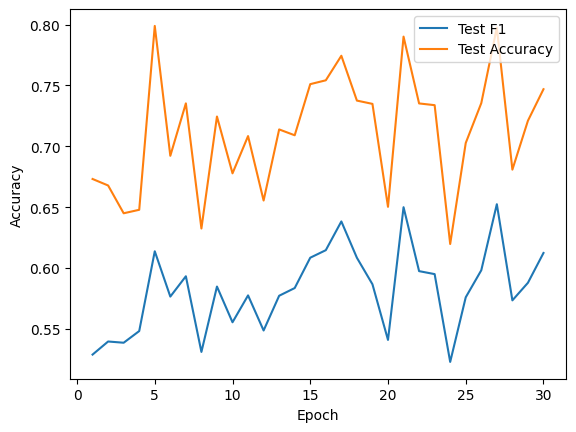

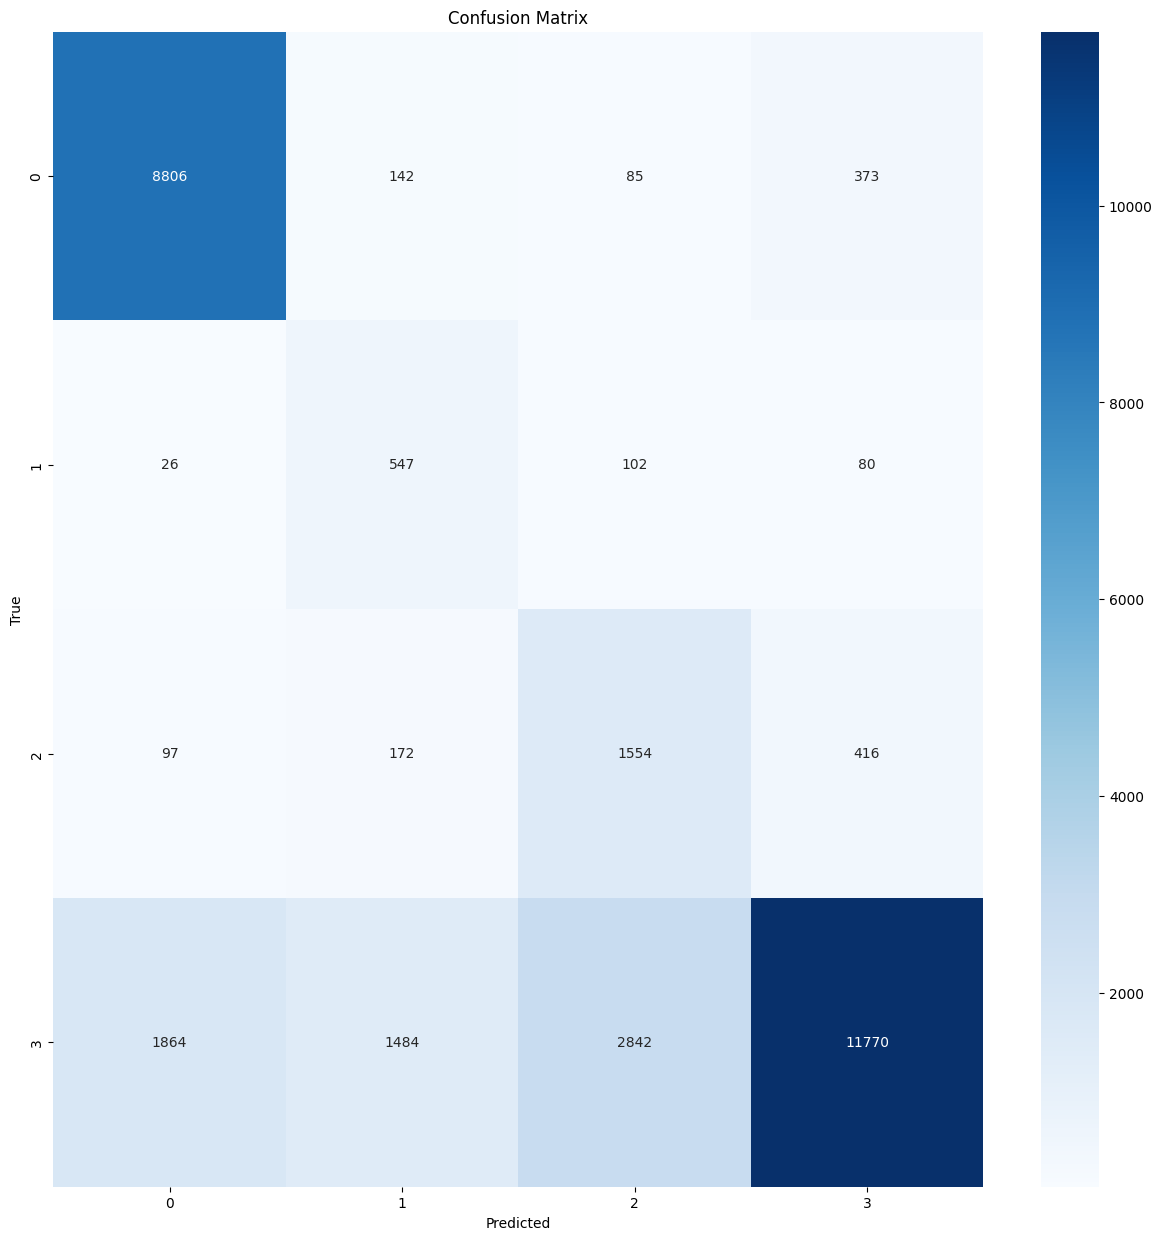

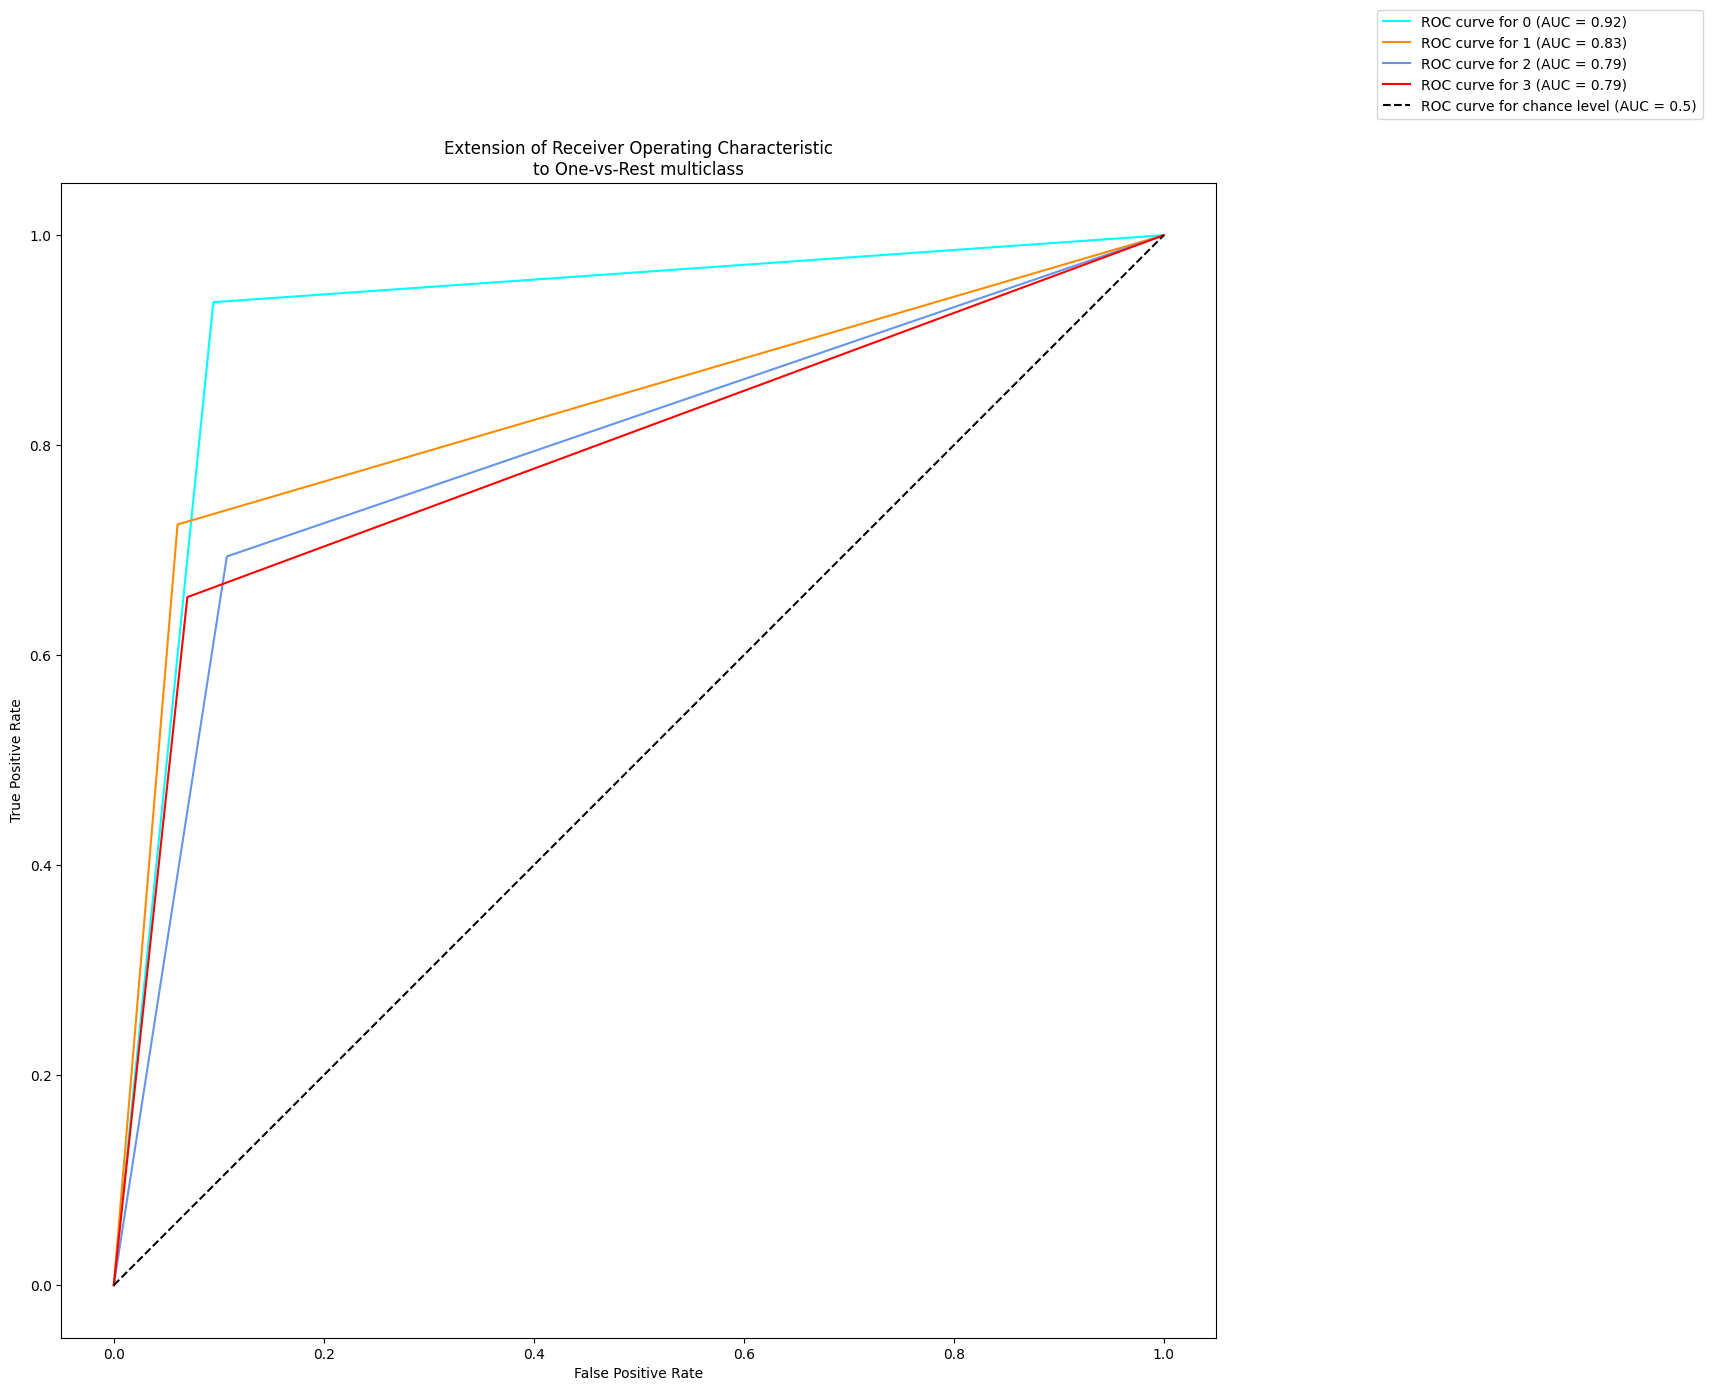

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      9406
           1       0.23      0.72      0.35       755
           2       0.34      0.69      0.46      2239
           3       0.93      0.66      0.77     17960

    accuracy                           0.75     30360
   macro avg       0.58      0.75      0.61     30360
weighted avg       0.83      0.75      0.77     30360



(0.7469367588932806,
 0.8344799562739696,
 0.7469367588932806,
 0.7676072475453743,
 {'Acc': {'Acc': 0.7989130434782609,
   'F1': 0.6138064503526043,
   'Auc': 0.7830092678193453,
   'Epoch': 5,
   'Auc_Per_Class': array([0.91374616, 0.73451325, 0.66729641, 0.81648125])},
  'Macro-F1': {'Acc': 0.7974967061923584,
   'F1': 0.6524865717536847,
   'Auc': 0.8369465085885237,
   'Epoch': 27,
   'Auc_Per_Class': array([0.92370122, 0.82419562, 0.77828491, 0.82160428])},
  'AUC': {'Acc': 0.7974967061923584,
   'F1': 0.6524865717536847,
   'Auc': 0.8369465085885237,
   'Epoch': 27,
   'Auc_Per_Class': array([0.92370122, 0.82419562, 0.77828491, 0.82160428])}})

In [7]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=False, report=True)

## Sex

Train Shape: (107695, 4872)
Test Shape: (30360, 4872)
Training Early Fusion Model:
The number of parameters of the model are: 623105
Epoch 1/30 - Test Accuracy: 0.8400, macro-f1: 0.8332, macro-AUC: 0.9764
Epoch 1/30 - Training Time: 27.30 seconds | Inference Time: 4.50 seconds
Epoch 2/30 - Test Accuracy: 0.8375, macro-f1: 0.8359, macro-AUC: 0.9808
Epoch 2/30 - Training Time: 27.92 seconds | Inference Time: 2.92 seconds
Epoch 3/30 - Test Accuracy: 0.9354, macro-f1: 0.9351, macro-AUC: 0.9838
Epoch 3/30 - Training Time: 24.63 seconds | Inference Time: 4.62 seconds
Epoch 4/30 - Test Accuracy: 0.9115, macro-f1: 0.9102, macro-AUC: 0.9837
Epoch 4/30 - Training Time: 20.52 seconds | Inference Time: 4.91 seconds
Epoch 5/30 - Test Accuracy: 0.9111, macro-f1: 0.9097, macro-AUC: 0.9839
Epoch 5/30 - Training Time: 19.35 seconds | Inference Time: 3.36 seconds
Epoch 6/30 - Test Accuracy: 0.9377, macro-f1: 0.9377, macro-AUC: 0.9851
Epoch 6/30 - Training Time: 17.52 seconds | Inference Time: 3.93 secon

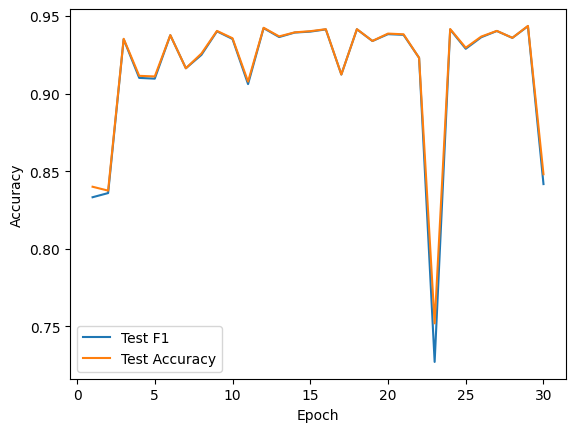

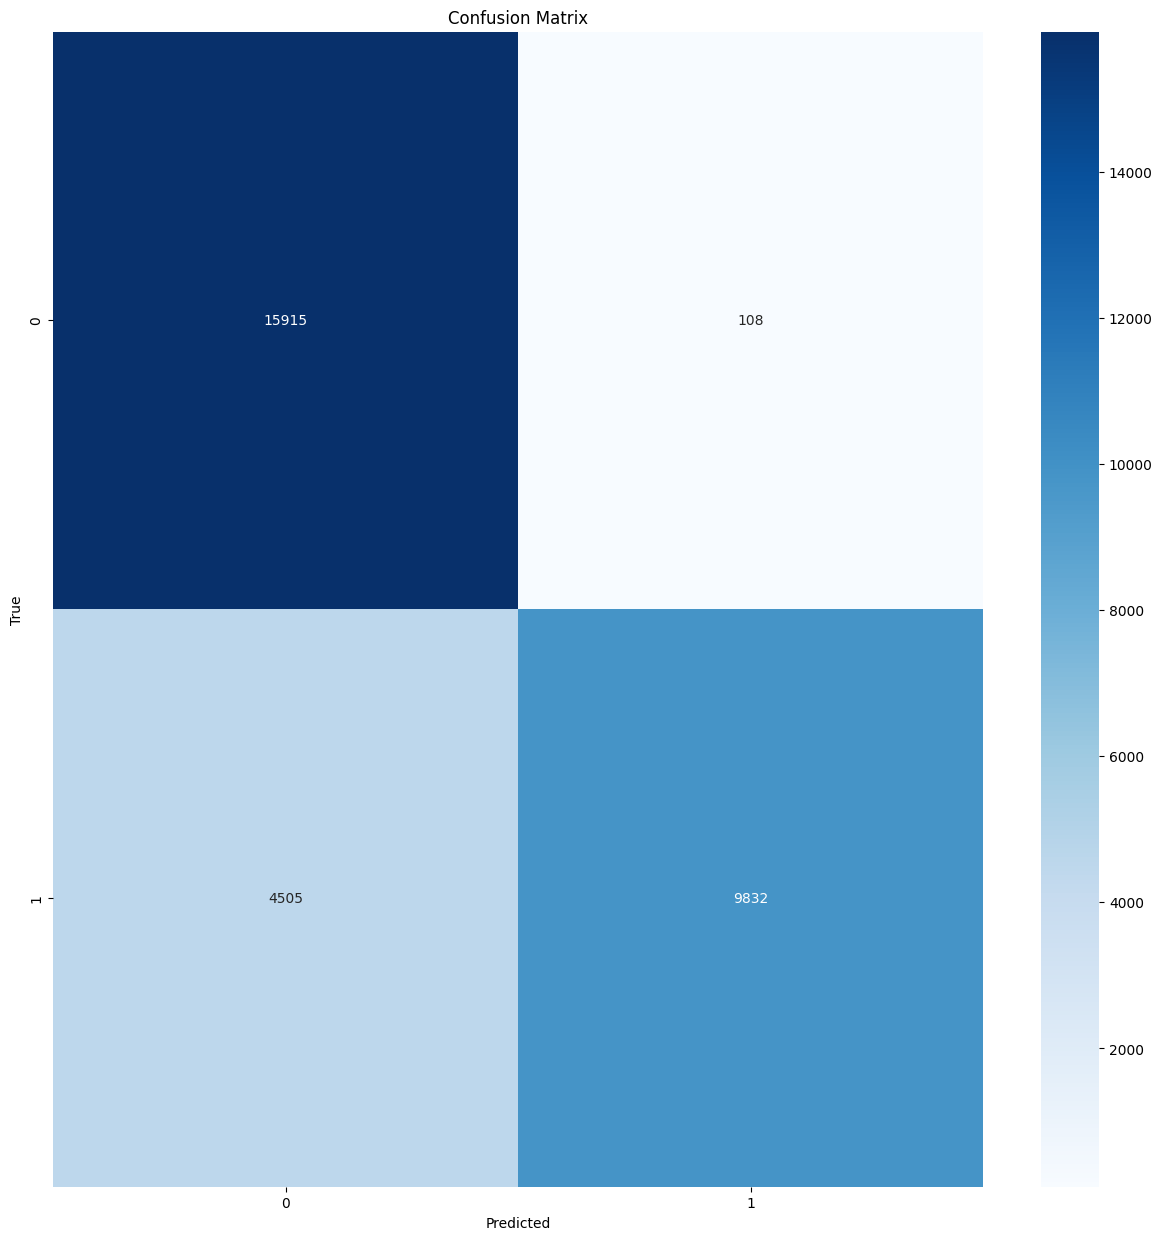

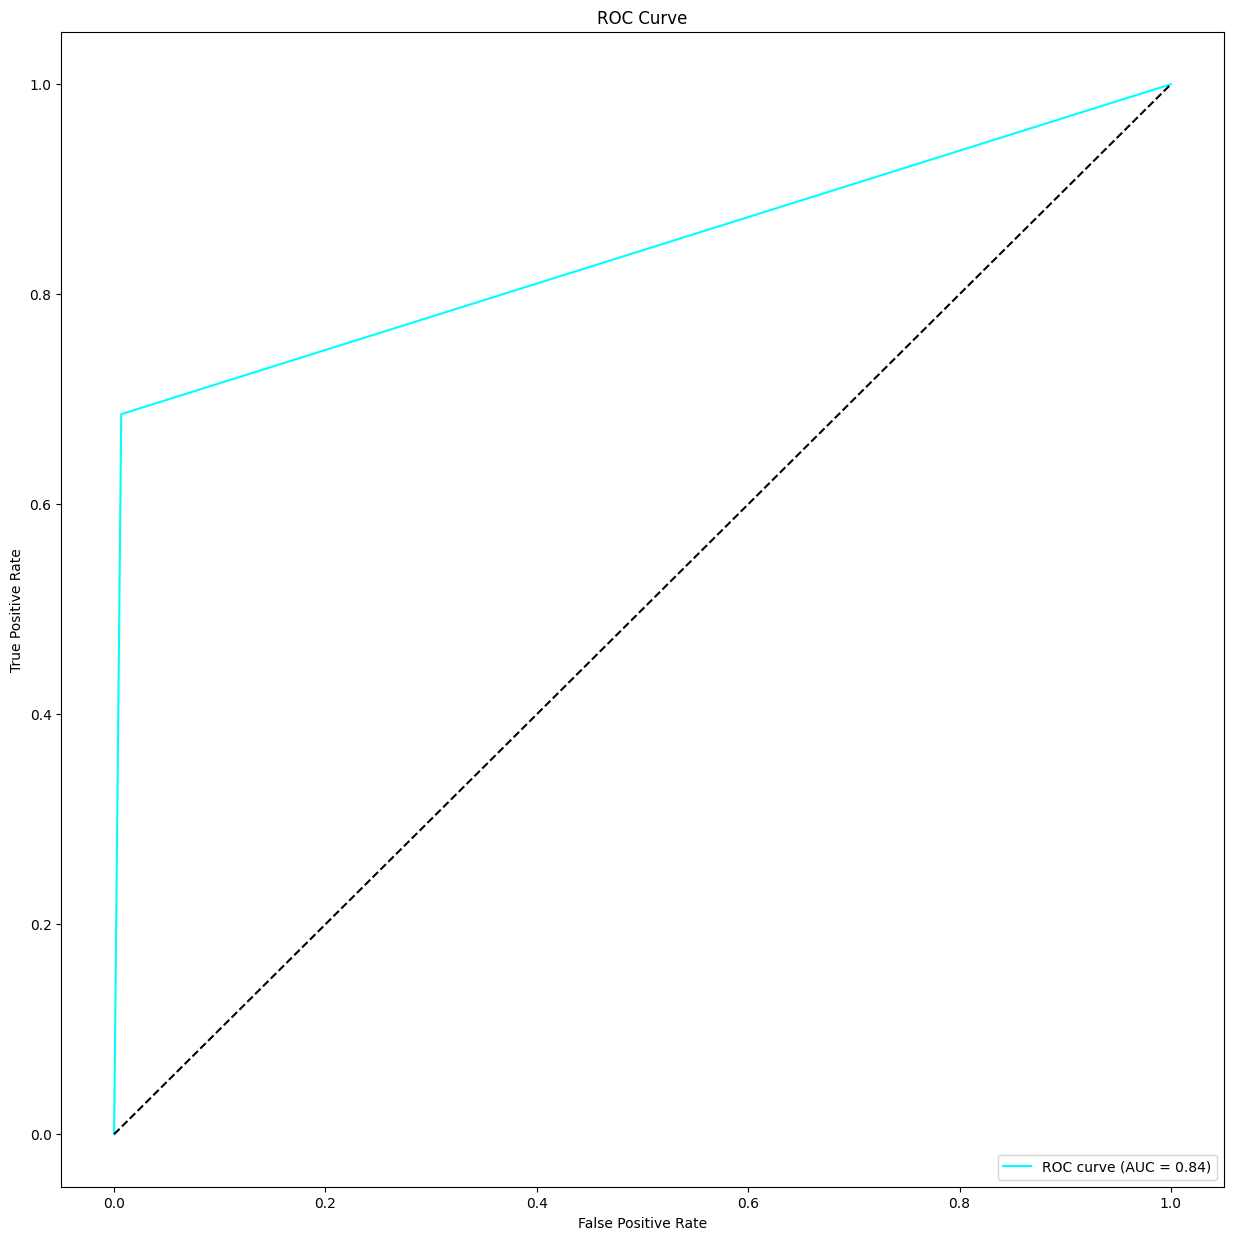

              precision    recall  f1-score   support

         0.0       0.78      0.99      0.87     16023
         1.0       0.99      0.69      0.81     14337

    accuracy                           0.85     30360
   macro avg       0.88      0.84      0.84     30360
weighted avg       0.88      0.85      0.84     30360



(0.8480566534914361,
 0.8784347460049188,
 0.8480566534914361,
 0.8434631206034698,
 {'Acc': {'Acc': 0.9436758893280632,
   'F1': 0.9435024778461427,
   'Auc': 0.9866406033096969,
   'Epoch': 29,
   'Auc_Per_Class': 0.9866406033096969},
  'Macro-F1': {'Acc': 0.9436758893280632,
   'F1': 0.9435024778461427,
   'Auc': 0.9866406033096969,
   'Epoch': 29,
   'Auc_Per_Class': 0.9866406033096969},
  'AUC': {'Acc': 0.936824769433465,
   'F1': 0.9363836876770231,
   'Auc': 0.9867586678807789,
   'Epoch': 26,
   'Auc_Per_Class': 0.9867586678807789}})

In [8]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'sex_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

text_input_size = len(text_columns)
image_input_size = len(image_columns)
if len(pd.unique(train_df[label_columns])) <= 2:
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
    
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=num_epochs, multilabel=False, report=True)

### Race

Train Shape: (107695, 4872)
Test Shape: (30360, 4872)
Training Early Fusion Model:
The number of parameters of the model are: 623363
Epoch 1/50 - Test Accuracy: 0.6627, macro-f1: 0.4702, macro-AUC: 0.7572
Epoch 1/50 - Training Time: 9.46 seconds | Inference Time: 2.31 seconds
Epoch 2/50 - Test Accuracy: 0.6352, macro-f1: 0.4597, macro-AUC: 0.7600
Epoch 2/50 - Training Time: 9.13 seconds | Inference Time: 3.19 seconds
Epoch 3/50 - Test Accuracy: 0.6589, macro-f1: 0.4781, macro-AUC: 0.7752
Epoch 3/50 - Training Time: 9.76 seconds | Inference Time: 3.06 seconds
Epoch 4/50 - Test Accuracy: 0.6803, macro-f1: 0.4858, macro-AUC: 0.7609
Epoch 4/50 - Training Time: 8.97 seconds | Inference Time: 2.51 seconds
Epoch 5/50 - Test Accuracy: 0.6101, macro-f1: 0.4477, macro-AUC: 0.7657
Epoch 5/50 - Training Time: 9.48 seconds | Inference Time: 2.43 seconds
Epoch 6/50 - Test Accuracy: 0.6516, macro-f1: 0.4724, macro-AUC: 0.7599
Epoch 6/50 - Training Time: 9.67 seconds | Inference Time: 2.40 seconds
Epo

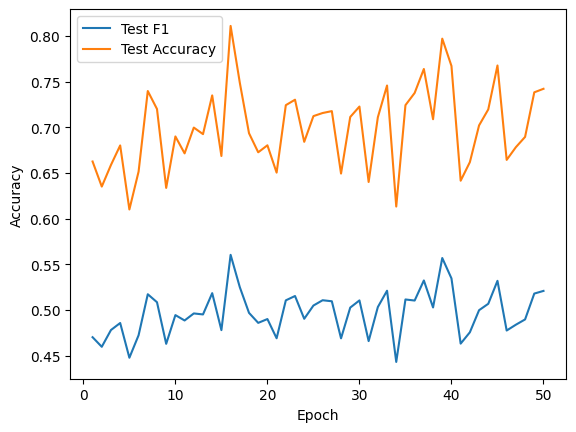

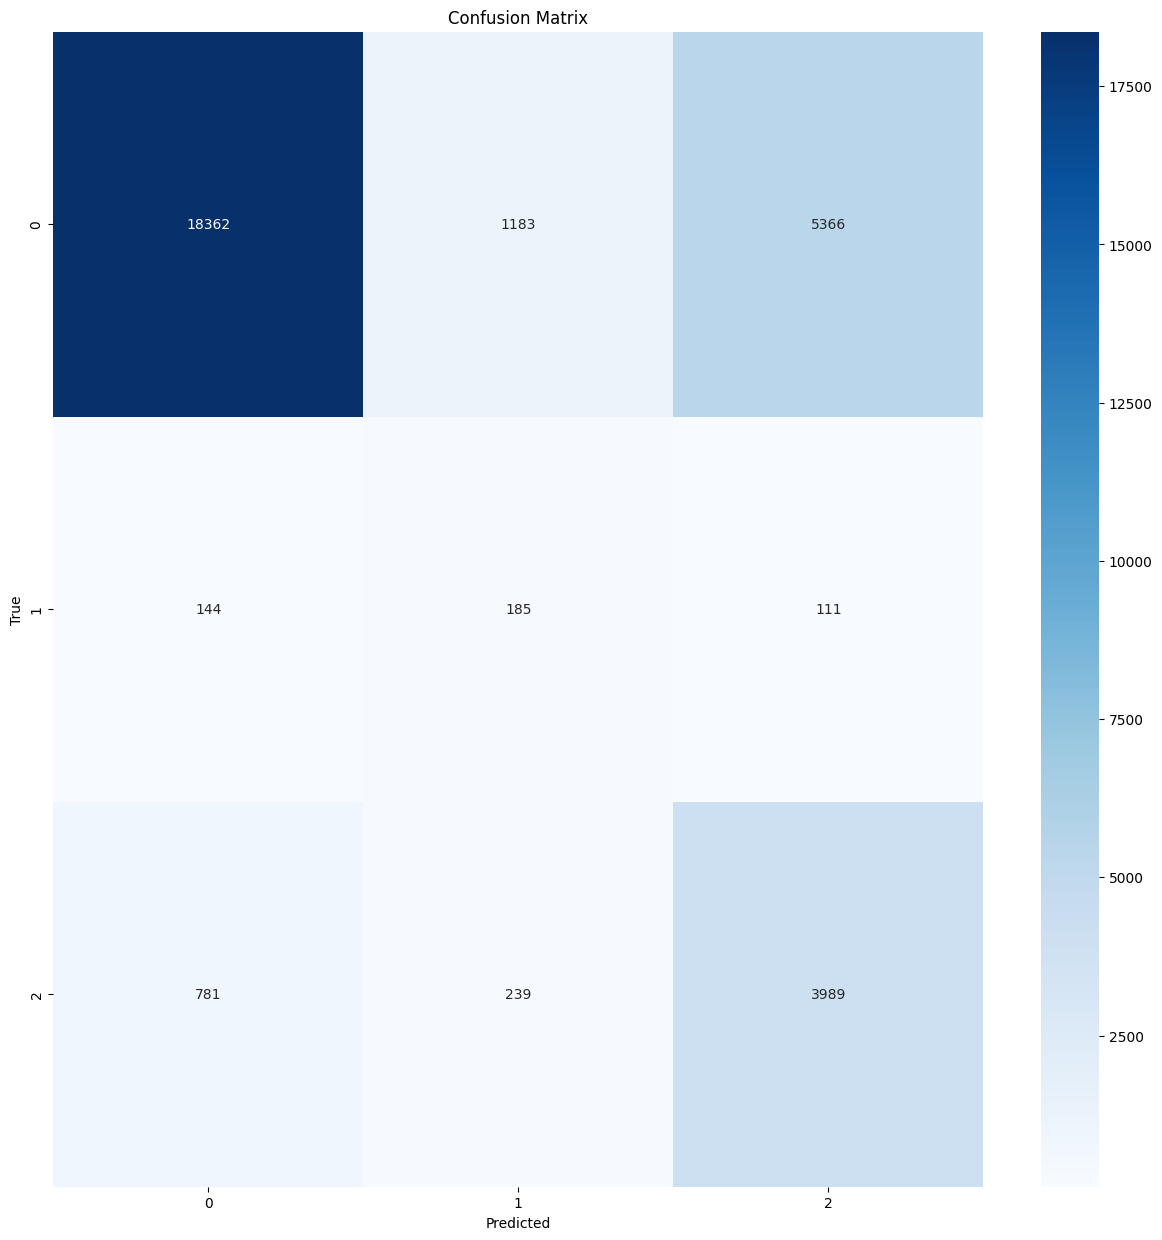

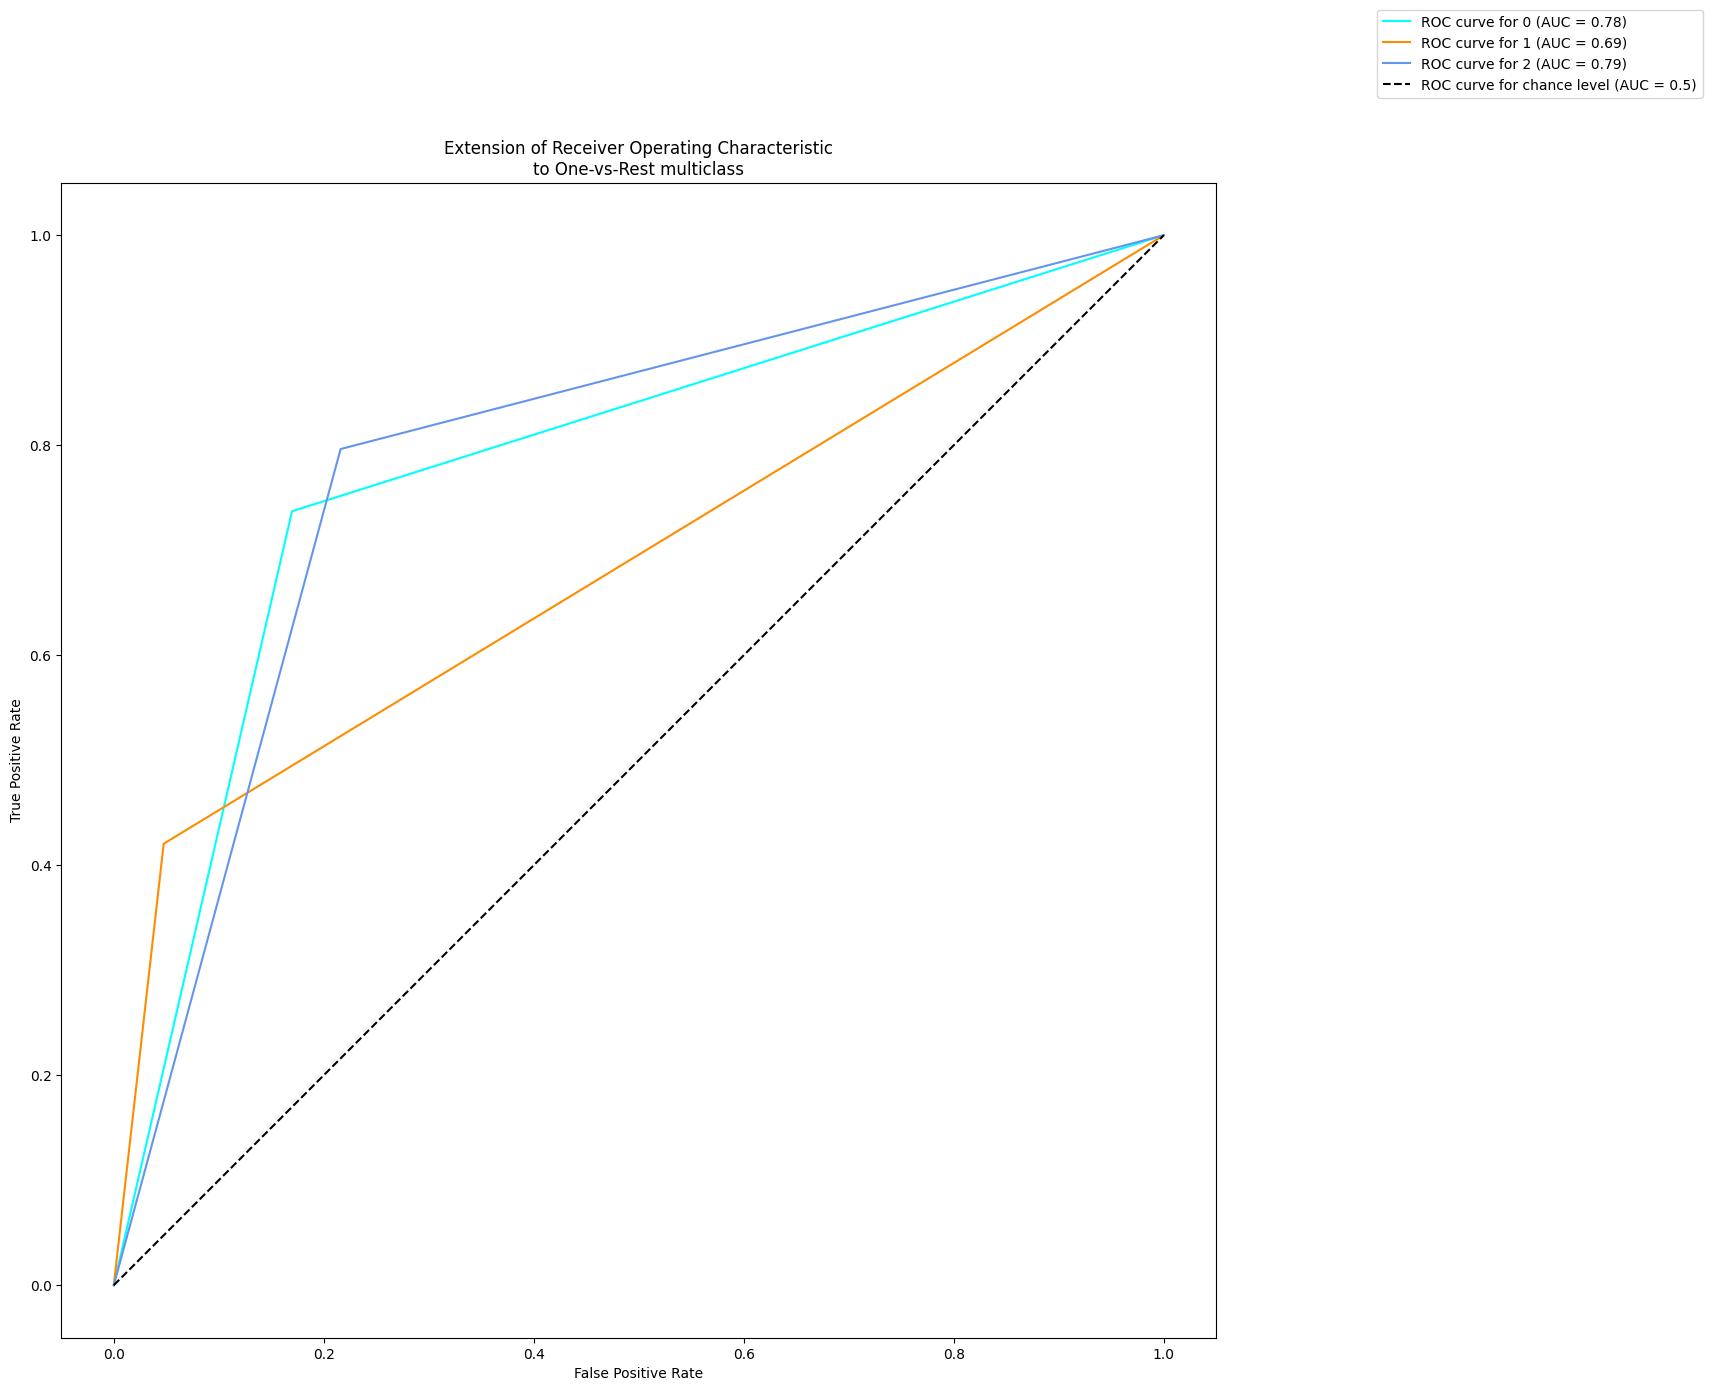

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     24911
           1       0.12      0.42      0.18       440
           2       0.42      0.80      0.55      5009

    accuracy                           0.74     30360
   macro avg       0.50      0.65      0.52     30360
weighted avg       0.85      0.74      0.78     30360



(0.7422924901185771,
 0.8523628087666796,
 0.7422924901185771,
 0.7753214938389874,
 {'Acc': {'Acc': 0.8111660079051384,
   'F1': 0.560450600795788,
   'Auc': 0.7485944998213184,
   'Epoch': 16,
   'Auc_Per_Class': array([0.78596828, 0.67117313, 0.78864209])},
  'Macro-F1': {'Acc': 0.8111660079051384,
   'F1': 0.560450600795788,
   'Auc': 0.7485944998213184,
   'Epoch': 16,
   'Auc_Per_Class': array([0.78596828, 0.67117313, 0.78864209])},
  'AUC': {'Acc': 0.7178524374176548,
   'F1': 0.5095859470614635,
   'Auc': 0.7815269191585384,
   'Epoch': 27,
   'Auc_Per_Class': array([0.77714812, 0.78758356, 0.77984908])}})

In [12]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'race_label'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

text_input_size = len(text_columns)
image_input_size = len(image_columns)
if len(pd.unique(train_df[label_columns])) <= 2:
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
    
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=False, report=True)